In [11]:
# ===============================
# Organoid Learning Evaluation
# ===============================

import os
import sys
import numpy as np
import pickle
import importlib
import matplotlib.pyplot as plt

# Check module path
module_path = os.path.abspath(os.path.join(''))  # adjust if needed
if module_path not in sys.path:
    sys.path.append(module_path)

# Import / reload full modules
import core.data_loader as data_loader
importlib.reload(data_loader)
import core.analysis_utils as analysis_utils
importlib.reload(analysis_utils)
import viz.plots_general as plots_general
importlib.reload(plots_general)
import core.map_utils as map_utils
importlib.reload(map_utils)
import OrgLearningEval
importlib.reload(OrgLearningEval)

# Import specific functions
from OrgLearningEval import OrgLearningEval


ModuleNotFoundError: No module named 'braindance'

In [2]:
# Check if core directory is in sys.path

# Print out current working directory
print("Current working directory:", os.getcwd())

# Print search path list
print("\nPython sys.path:")
for p in sys.path:
    print("  ", p)

# Check whether 'core/data_loader.py' exists from this working directory
core_path = os.path.join(os.getcwd(), "core", "data_loader.py")
print("\nChecking for core/data_loader.py:")
print("Exists" if os.path.exists(core_path) else "  NOT FOUND")

# Check core directory contents
print("Contents of ./core/:", os.listdir("./core"))

Current working directory: /Users/main_mac/data/org_learning_eval

Python sys.path:
   /Users/main_mac/data
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers/pydev
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers-pro/jupyter_debug
   /opt/anaconda3/envs/brain/lib/python310.zip
   /opt/anaconda3/envs/brain/lib/python3.10
   /opt/anaconda3/envs/brain/lib/python3.10/lib-dynload
   
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages
   /Users/main_mac/data/org_learning_eval/BrainDance
   /Users/main_mac/data/org_learning_eval
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages/setuptools/_vendor

Checking for core/data_loader.py:
Exists
Contents of ./core/: ['data_loader.py', '__init__.py', 'spike_data_utils.py', '__pycache__', 'map_utils.py', 'analysis_utils.py']


In [12]:
try:
    from core.data_loader import load_pickle, load_datasets
    print("Imported successfully.")
except Exception as e:
    print("Import failed:", e)


Imported successfully.


Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Random: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Null: <class 'spikedata.spikedata.SpikeData'>
Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes

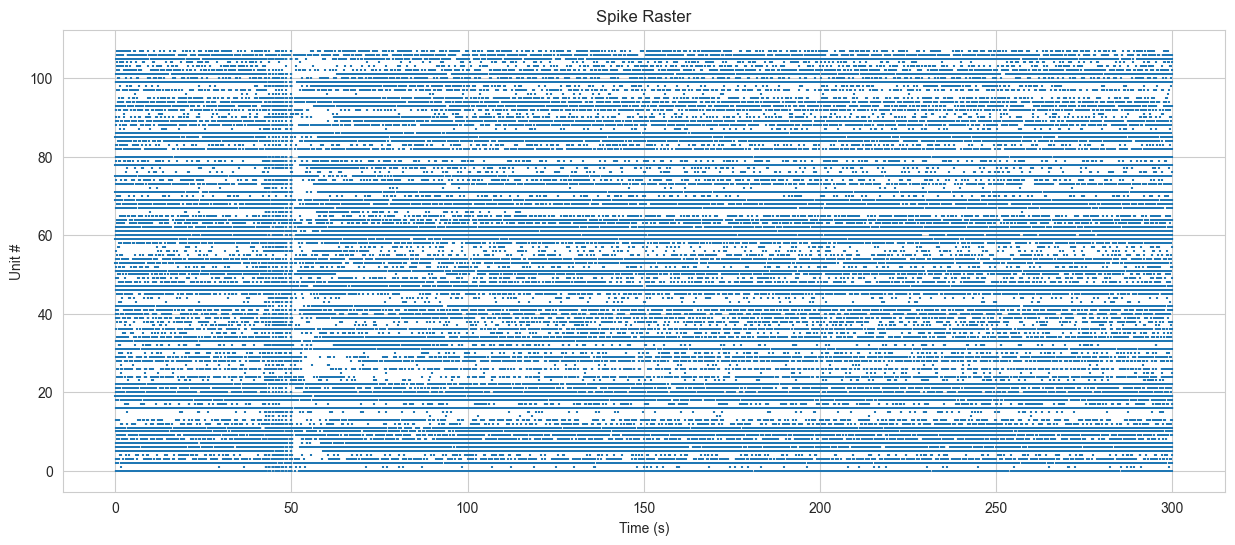

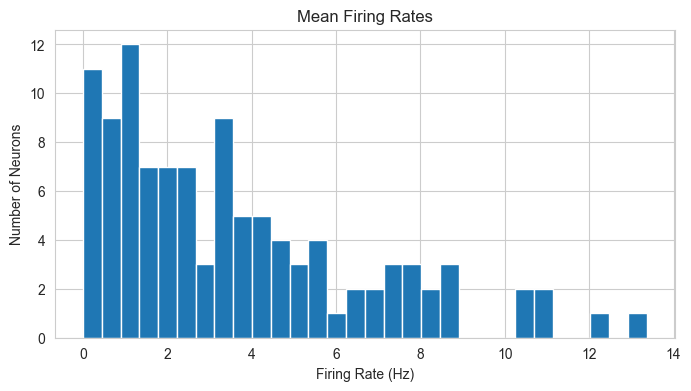

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


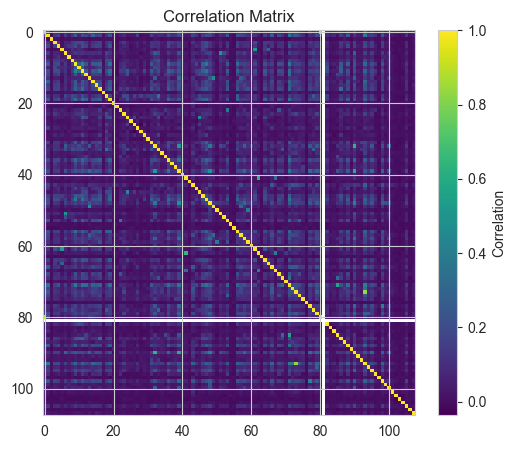

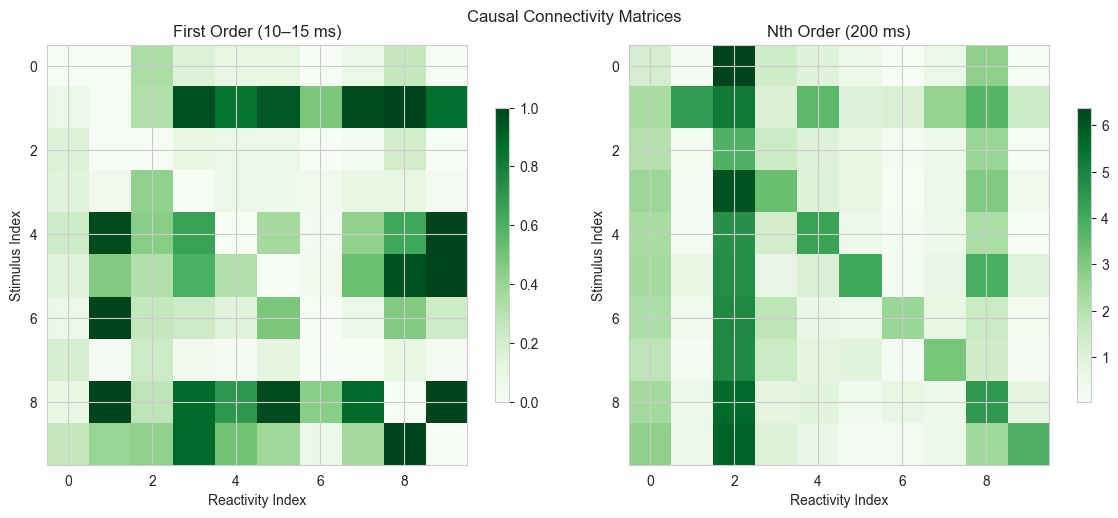

In [4]:
ole = OrgLearningEval()  # Loads all datasets and keys contained, sets "Baseline" as default dataset, and prints confirmation
ole.show_raster()        # Shows raster for default dataset
ole.show_mean_firing_rates() # Shows mean firing rate plot for default dataset
ole.show_correlation_matrix()  # Shows a correlation matrix plot for default dataset
ole.show_causal_plot() # Shows matrix of first-order and multi-order connectivity for organoid of interest

Switched to dataset: Adaptive


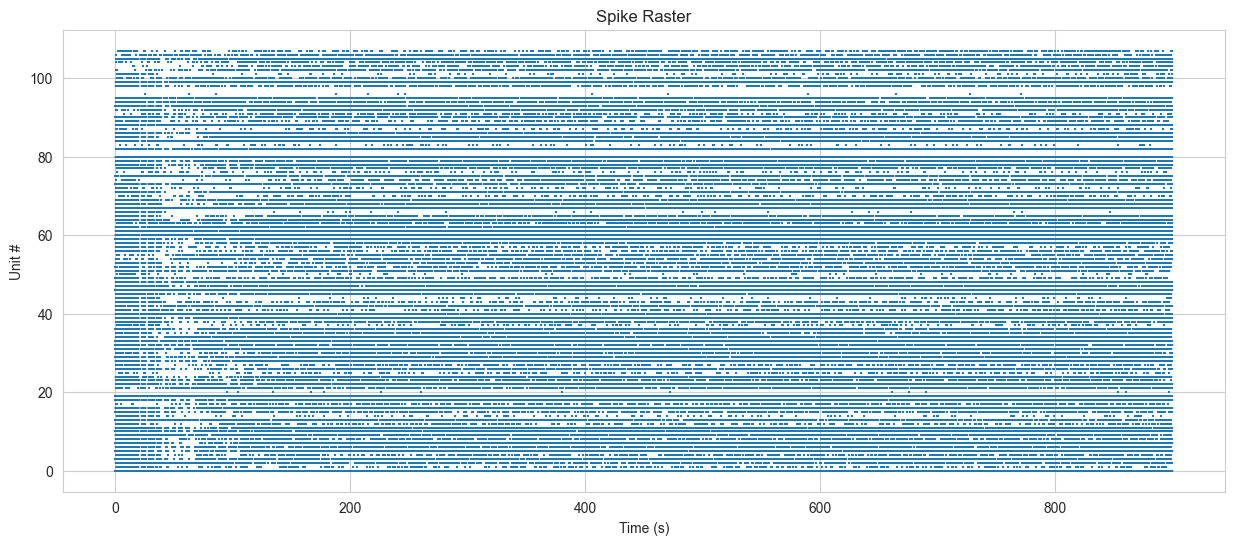

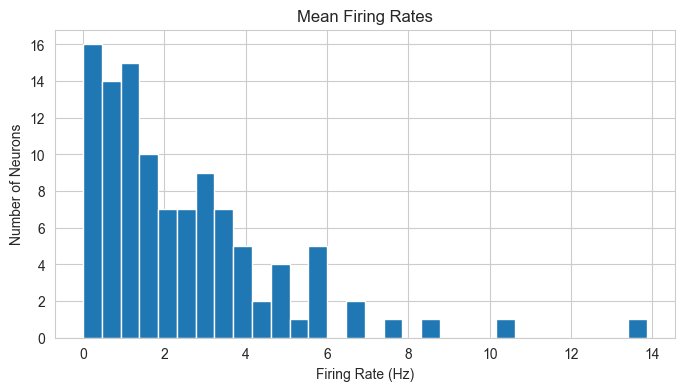

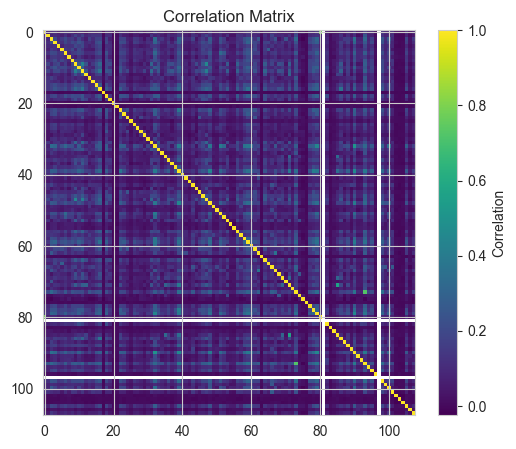

In [5]:
# Switch to different training condition and view plots
ole.set_dataset("Adaptive")
ole.show_raster()
ole.show_mean_firing_rates()
ole.show_correlation_matrix()


In [8]:
ole = OrgLearningEval()
reward_df = ole.get_reward_df("Adaptive")
reward_df.head()

Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Random: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Null: <class 'spikedata.spikedata.SpikeData'>
Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes

,time,episode,reward
0,3.911218,0,19.0
1,18.770805,1,56.0
2,24.654084,2,12.0
3,31.596691,3,17.0
4,38.112137,4,15.0


In [9]:
print("Adaptive Reward DataFrame:")
display(ole.get_reward_df("Adaptive").head())

print("\n Random Reward DataFrame:")
display(ole.get_reward_df("Random").head())

print("\n Null Reward DataFrame:")
display(ole.get_reward_df("Null").head())

Adaptive Reward DataFrame:


,time,episode,reward
0,3.911218,0,19.0
1,18.770805,1,56.0
2,24.654084,2,12.0
3,31.596691,3,17.0
4,38.112137,4,15.0



 Random Reward DataFrame:


,time,episode,reward
0,10.916741,0,53.0
1,22.128940,1,38.0
2,28.397783,2,14.0
3,35.692659,3,19.0
4,63.851734,4,120.0



 Null Reward DataFrame:


,time,episode,reward
0,4.958258,0,24.0
1,18.258702,1,48.0
2,26.177174,2,22.0
3,36.393520,3,33.0
4,42.694989,4,14.0


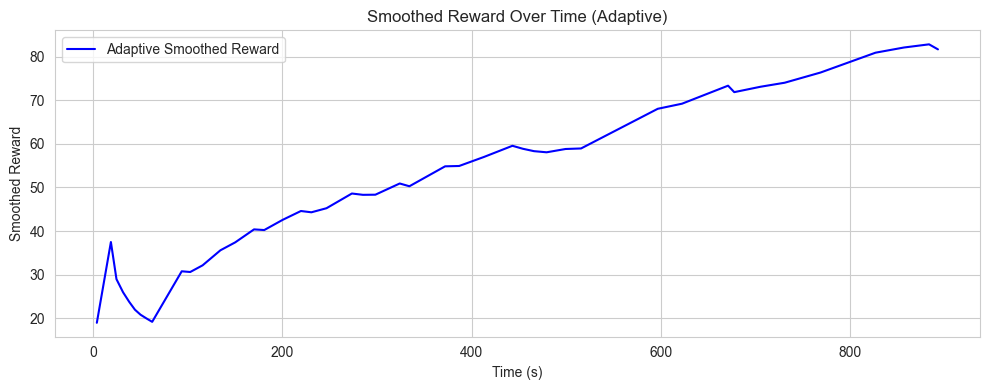

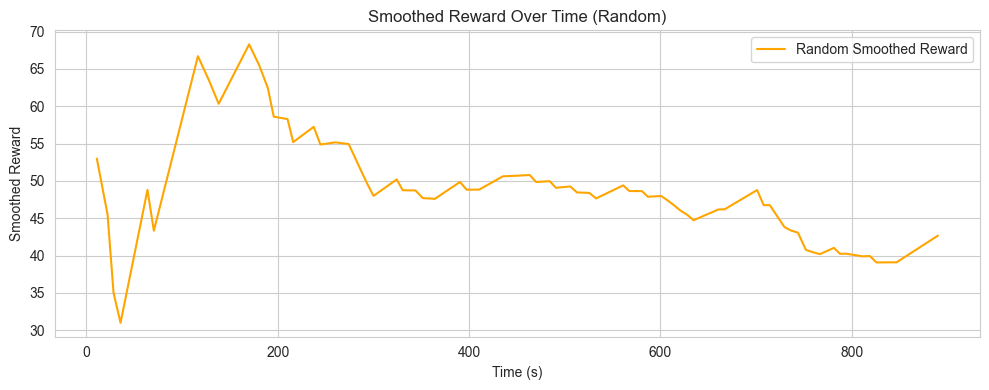

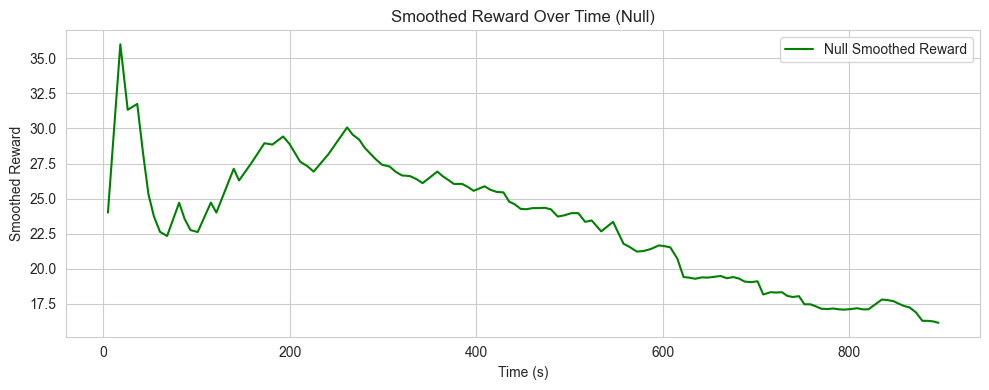

In [10]:
ole.show_reward_plot("Adaptive", color="blue")
ole.show_reward_plot("Random", color="orange")
ole.show_reward_plot("Null", color="green")

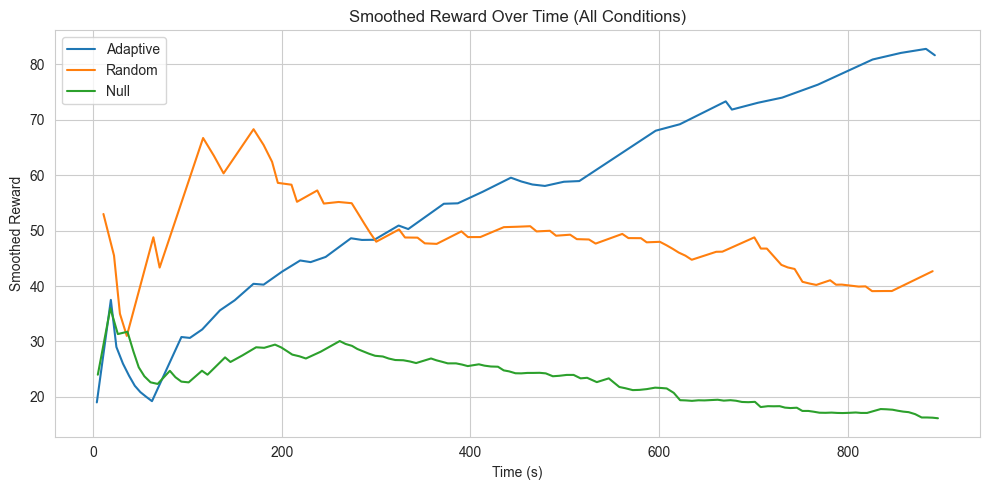

In [257]:
ole.show_all_rewards_overlay()

In [15]:
mapping_df = ole.metadata["mapping"]
mapping_df.head()

,channel,electrode,x,y
0,0,18598,2065.0,1470.0
1,1,20644,3220.0,1627.5
2,2,19040,2100.0,1505.0
3,3,21723,2852.5,1715.0
4,4,14939,3482.5,1172.5


In [154]:
with open("data/causal_info.pkl", "rb") as f:
    causal_info = pickle.load(f)

first_order = causal_info["first_order_connectivity"]
print(type(first_order))         # Should be <class 'numpy.ndarray'>
print(first_order.shape)        # Should be (N, N)

<class 'numpy.ndarray'>
(10, 10)


In [13]:
print("Training electrodes:", ole.metadata["training_electrodes"])
print("Encode electrodes:", ole.metadata["encode_electrodes"])
print("Decode electrodes:", ole.metadata["decode_electrodes"])

Training electrodes: [24768, 22182, 23923, 909, 3229, 17335]
Encode electrodes: [23275, 25039]
Decode electrodes: [18429, 18385]


In [156]:
encode_local = [0, 1]  # or any valid indices from 0 to 9
decode_local = [8, 9]  # also from 0 to 9

In [157]:
first_order = causal_info["first_order_connectivity"]
multi_order = causal_info["multi_order_connectivity"]
burst_percent = causal_info["burst_percent"]

c1_values = [first_order[i, j] for i in encode_local for j in decode_local]
cm_values = [multi_order[i, j] for i in encode_local for j in decode_local]
burst_values = [burst_percent[j] for j in decode_local]

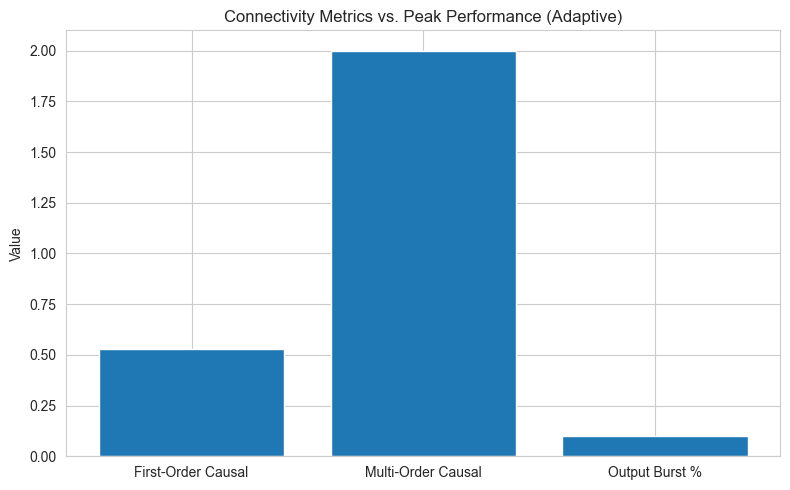

In [158]:
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]
values = [np.mean(c1_values), np.mean(cm_values), np.mean(burst_values)]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [159]:
indices = list(range(10))  # 10 training neurons

c1_values = [first_order[i, j] for i in indices for j in indices if i != j]
cm_values = [multi_order[i, j] for i in indices for j in indices if i != j]
burst_values = [burst_percent[j] for j in indices]

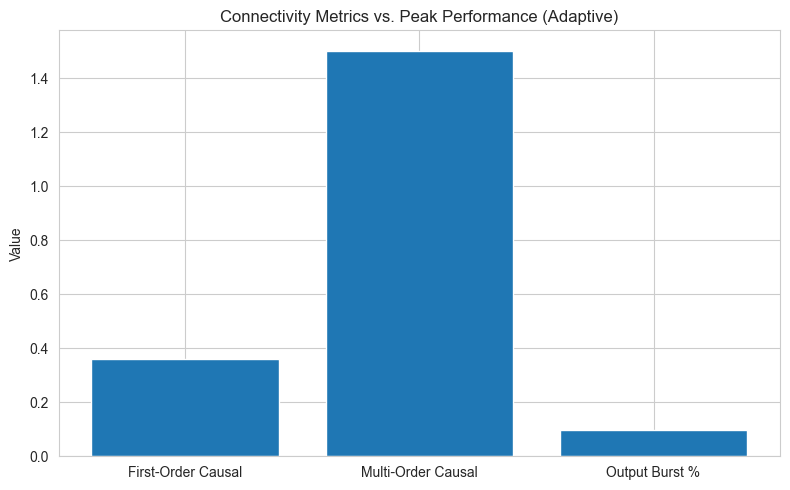

In [160]:
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]
values = [np.mean(c1_values), np.mean(cm_values), np.mean(burst_values)]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()

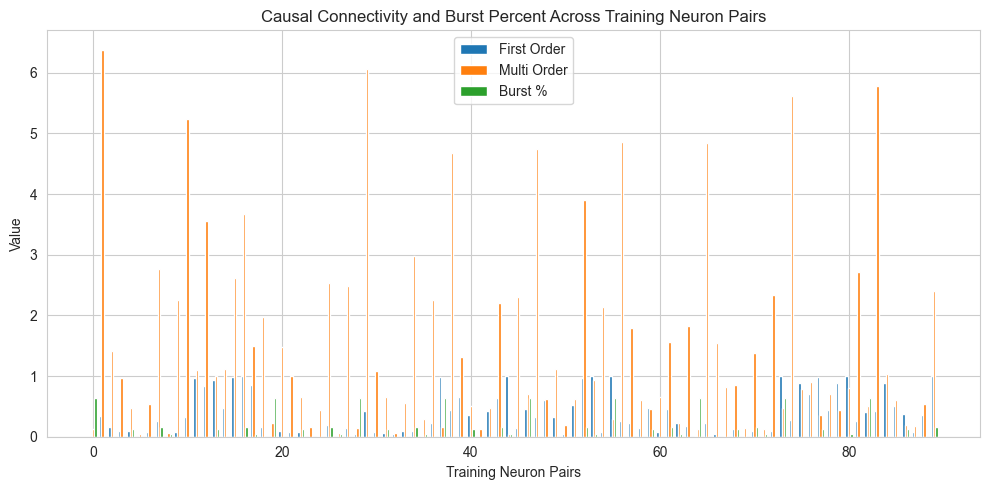

In [161]:
import matplotlib.pyplot as plt

# Use 10 training neurons: local indices 0–9
training_pairs = [(i, j) for i in range(10) for j in range(10) if i != j]

# Extract causal values
first_vals = [first_order[i, j] for i, j in training_pairs]
multi_vals = [multi_order[i, j] for i, j in training_pairs]
burst_vals = [burst_percent[j] for _, j in training_pairs]  # burst of post-synaptic unit

# Plotting
plt.figure(figsize=(10, 5))
bar_width = 0.25
x = range(len(training_pairs))

plt.bar([xi - bar_width for xi in x], first_vals, width=bar_width, label='First Order')
plt.bar(x, multi_vals, width=bar_width, label='Multi Order')
plt.bar([xi + bar_width for xi in x], burst_vals, width=bar_width, label='Burst %')

plt.xlabel('Training Neuron Pairs')
plt.ylabel('Value')
plt.title('Causal Connectivity and Burst Percent Across Training Neuron Pairs')
plt.legend()
plt.tight_layout()
plt.show()


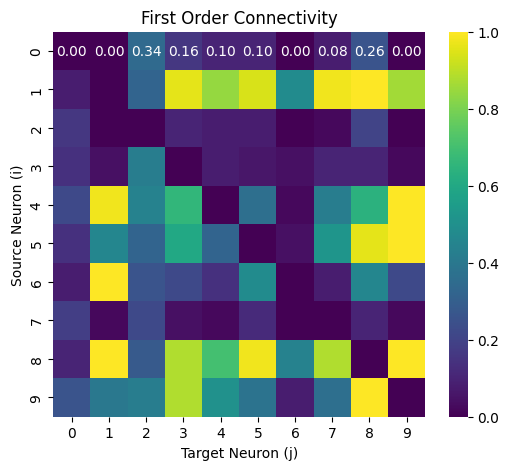

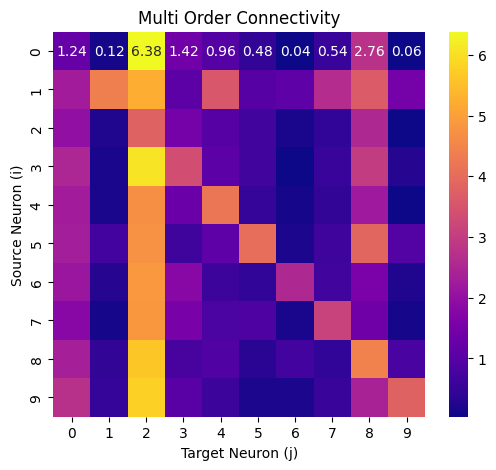

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for first_order
plt.figure(figsize=(6, 5))
sns.heatmap(first_order, annot=True, fmt=".2f", cmap='viridis')
plt.title("First Order Connectivity")
plt.xlabel("Target Neuron (j)")
plt.ylabel("Source Neuron (i)")
plt.show()

# Heatmap for multi_order
plt.figure(figsize=(6, 5))
sns.heatmap(multi_order, annot=True, fmt=".2f", cmap='plasma')
plt.title("Multi Order Connectivity")
plt.xlabel("Target Neuron (j)")
plt.ylabel("Source Neuron (i)")
plt.show()


In [87]:
pattern_log = log_data["Adaptive"]["pattern"]
print("Pattern log type:", type(pattern_log))
print("\nColumns:")
print(pattern_log.columns)
print("\nSample:")
print(pattern_log.head())


Pattern log type: <class 'pandas.core.frame.DataFrame'>

Columns:
Index(['time', 'reward', 'stim_indices'], dtype='object')

Sample:
        time  reward stim_indices
0   3.911506    19.0       [4, 3]
1   4.019525    19.0       [4, 3]
2   4.128859    19.0       [4, 3]
3   4.237211    19.0       [4, 3]
4  18.771035    56.0       [6, 5]


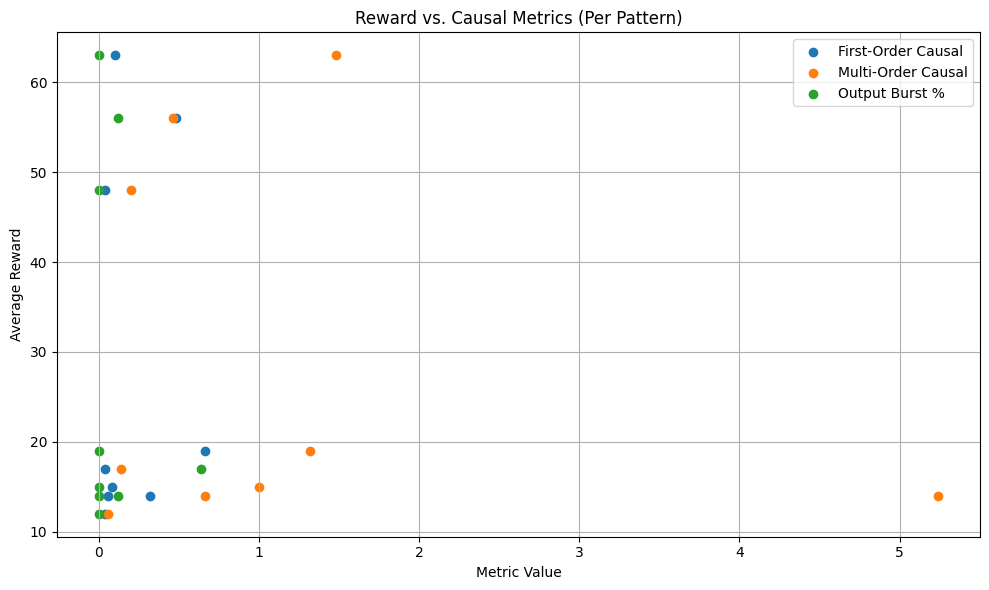

In [93]:
import pandas as pd

# Get causal metrics and mapping
first_order = causal_info["first_order_connectivity"]
multi_order = causal_info["multi_order_connectivity"]
burst_percent = causal_info["burst_percent"]
training_inds = metadata["training_inds"]

# Make stim_indices hashable
pattern_log["stim_key"] = pattern_log["stim_indices"].apply(tuple)

# Compute mean reward per pattern
pattern_rewards = pattern_log.groupby("stim_key")["reward"].mean()

# Collect metrics per stimulation pattern
rows = []
for stim_key, avg_reward in pattern_rewards.items():
    if len(stim_key) != 2:
        continue  # skip malformed patterns
    stim_i, stim_j = stim_key

    # Look up causal metrics and burst
    c1 = first_order[stim_i, stim_j]
    cm = multi_order[stim_i, stim_j]
    burst = burst_percent[stim_j]

    rows.append({
        "Pattern": f"{stim_i}-{stim_j}",
        "AvgReward": avg_reward,
        "FirstOrder": c1,
        "MultiOrder": cm,
        "Burst": burst
    })

df = pd.DataFrame(rows)

# === Plot ===
plt.figure(figsize=(10, 6))
plt.scatter(df["FirstOrder"], df["AvgReward"], label="First-Order Causal")
plt.scatter(df["MultiOrder"], df["AvgReward"], label="Multi-Order Causal")
plt.scatter(df["Burst"], df["AvgReward"], label="Output Burst %")
plt.xlabel("Metric Value")
plt.ylabel("Average Reward")
plt.title("Reward vs. Causal Metrics (Per Pattern)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


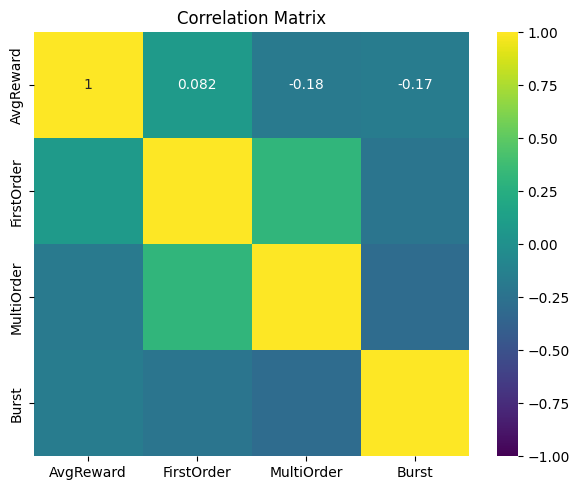

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
metrics_df = df[["AvgReward", "FirstOrder", "MultiOrder", "Burst"]]

# Compute correlation matrix
corr = metrics_df.corr()

# Plot correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="viridis", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


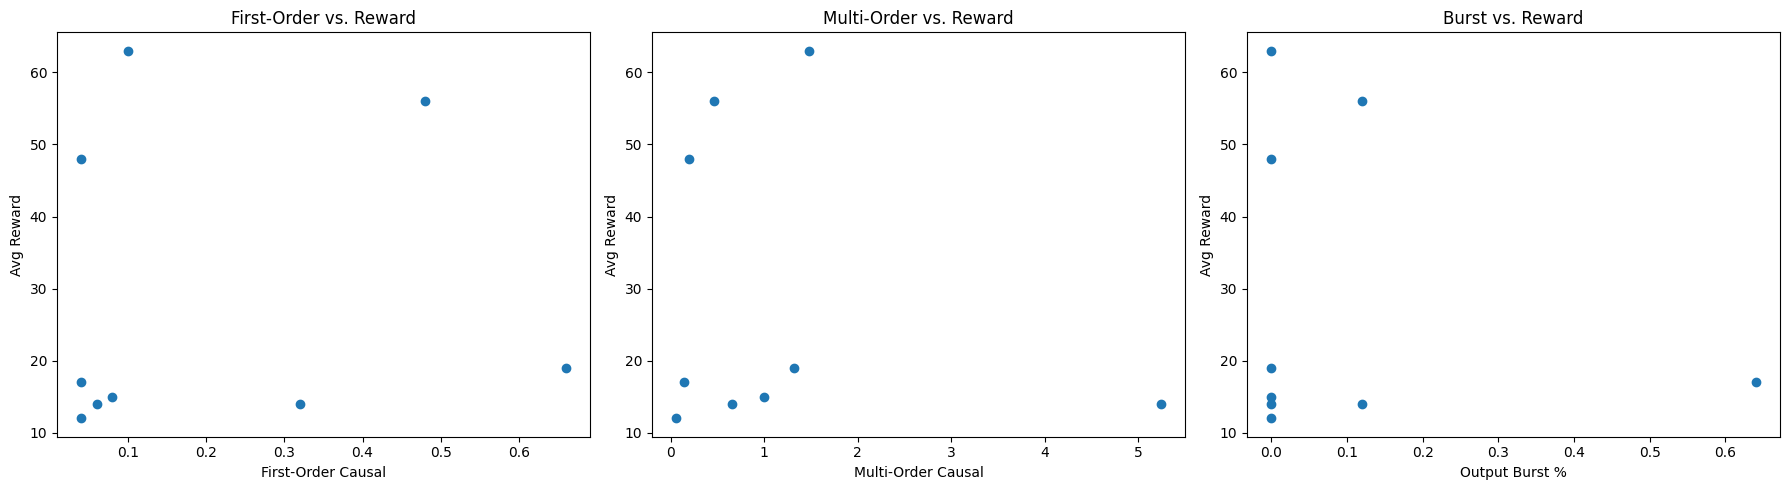

In [95]:
# Assumes `df` has columns: "AvgReward", "FirstOrder", "MultiOrder", "Burst"
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter: AvgReward vs FirstOrder
axs[0].scatter(df["FirstOrder"], df["AvgReward"])
axs[0].set_xlabel("First-Order Causal")
axs[0].set_ylabel("Avg Reward")
axs[0].set_title("First-Order vs. Reward")

# Scatter: AvgReward vs MultiOrder
axs[1].scatter(df["MultiOrder"], df["AvgReward"])
axs[1].set_xlabel("Multi-Order Causal")
axs[1].set_ylabel("Avg Reward")
axs[1].set_title("Multi-Order vs. Reward")

# Scatter: AvgReward vs Burst
axs[2].scatter(df["Burst"], df["AvgReward"])
axs[2].set_xlabel("Output Burst %")
axs[2].set_ylabel("Avg Reward")
axs[2].set_title("Burst vs. Reward")

plt.tight_layout()
plt.show()


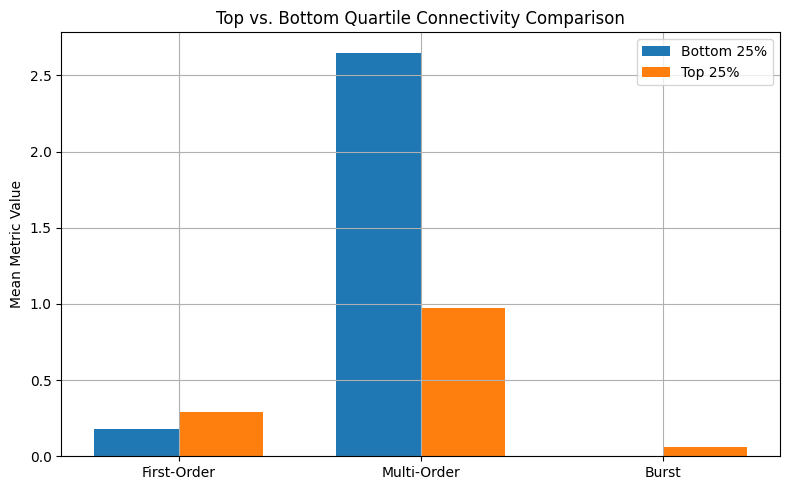

In [96]:
# Sort by AvgReward
df_sorted = df.sort_values("AvgReward")

# Define quartile size
n = len(df_sorted) // 4

# Split into top and bottom quartiles
bottom_q = df_sorted.iloc[:n]
top_q = df_sorted.iloc[-n:]

# Compute means
metrics = ["FirstOrder", "MultiOrder", "Burst"]
top_means = [top_q[m].mean() for m in metrics]
bottom_means = [bottom_q[m].mean() for m in metrics]

# Plot
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, bottom_means, width, label="Bottom 25%")
plt.bar(x + width/2, top_means, width, label="Top 25%")

plt.xticks(x, ["First-Order", "Multi-Order", "Burst"])
plt.ylabel("Mean Metric Value")
plt.title("Top vs. Bottom Quartile Connectivity Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [97]:
print(df.columns)
print(df.head())

Index(['Pattern', 'AvgReward', 'FirstOrder', 'MultiOrder', 'Burst'], dtype='object')
  Pattern  AvgReward  FirstOrder  MultiOrder  Burst
0     1-2       14.0        0.32        5.24   0.00
1     2-3       63.0        0.10        1.48   0.00
2     2-4       15.0        0.08        1.00   0.00
3     3-1       17.0        0.04        0.14   0.64
4     3-5       14.0        0.06        0.66   0.12


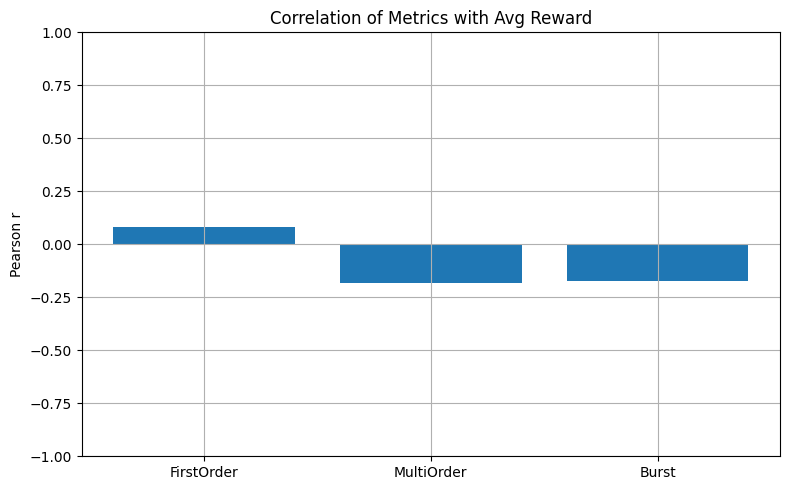

In [98]:
from scipy.stats import pearsonr

# Compute Pearson correlations with AvgReward
metrics = ["FirstOrder", "MultiOrder", "Burst"]
correlations = []

for metric in metrics:
    r, _ = pearsonr(df[metric], df["AvgReward"])
    correlations.append(r)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metrics, correlations)
plt.ylim(-1, 1)
plt.ylabel("Pearson r")
plt.title("Correlation of Metrics with Avg Reward")
plt.grid(True)
plt.tight_layout()
plt.show()


In [174]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset labels and metric names
datasets = ["Adaptive", "Random", "Null"]
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]

# Extract metric values for each dataset
results = []

for label in datasets:
    # Assume causal_info[label] exists, or switch this to however you've stored labeled causal_info
    ci = causal_info[label]  # This assumes causal_info is a dict of labeled entries
    fo = ci["first_order_connectivity"]
    mo = ci["multi_order_connectivity"]
    bp = ci["burst_percent"]

    # Use the same encoding/decoding pairs
    c1_values = [fo[i, j] for i in encode_local for j in decode_local]
    cm_values = [mo[i, j] for i in encode_local for j in decode_local]
    burst_values = [bp[j] for j in decode_local]

    results.append([
        np.mean(c1_values),
        np.mean(cm_values),
        np.mean(burst_values)
    ])

# Convert to NumPy array for easy plotting
results = np.array(results)  # Shape: (3 datasets x 3 metrics)

# --- Plotting ---
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(10, 6))
for i, label in enumerate(datasets):
    plt.bar(x + i * width, results[i], width=width, label=label)

plt.xticks(x + width, metrics)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (All Datasets)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Adaptive'

In [208]:
from core.data_loader import load_log_data, load_spike_data
from OrgLearningEval import OrgLearningEval
from core.data_loader import load_causal_info, load_metadata

print("\n=== CAUSAL INFO + METADATA ===")
causal_info = load_causal_info()
metadata = load_metadata()

log_paths = {
    "Adaptive": "data/exp1_cartpole_long_6_logs.pkl",
    "Random":   "data/exp1_cartpole_long_7_logs.pkl",
    "Null":     "data/exp1_cartpole_long_8_logs.pkl"
}

spike_paths = {
    "Baseline": "data/baseline_spike_data.pkl",
    "Adaptive": "data/exp1_cartpole_long_6_spike_data.pkl",
    "Random":   "data/exp1_cartpole_long_7_spike_data.pkl",
    "Null":     "data/exp1_cartpole_long_8_spike_data.pkl"
}

print("\n === LOG DATA ===")
log_data = load_log_data(log_paths)

print("\n=== SPIKE DATA ===")
spike_data = load_spike_data(spike_paths)



=== CAUSAL INFO + METADATA ===
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs']

 === LOG DATA ===
Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']

=== SPIKE DATA ===
Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeD

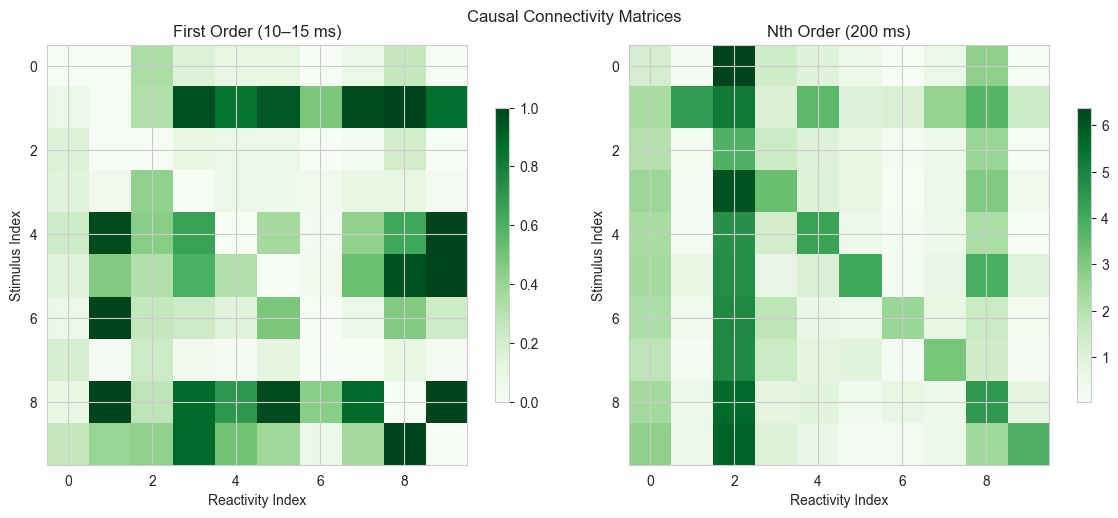

In [205]:
from org_learning_eval.core.analysis_utils import causal_plot

causal_plot(causal_info)

In [1]:
import sys
print(sys.executable)


/opt/anaconda3/envs/brain/bin/python
